In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re

In [67]:
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)

In [68]:
def process_types(string):
    return string.split('*')[0]

def process_types_light(string):
    pattern = f'[TRABVJ]+?\d+'
    res = re.search(pattern, string)[0]
    return res


## Data for light clf

In [69]:
vdjdb = pd.read_csv('vdjb_short.csv')
alpha_data = vdjdb[['a_cdr3aa', 'a_v', 'a_j']]
beta_data = vdjdb[['b_cdr3aa', 'b_v', 'b_j']]

In [70]:
alpha_data['a_v'] = alpha_data['a_v'].apply(process_types_light)
beta_data['b_v'] = beta_data['b_v'].apply(process_types_light)

alpha_data['a_j'] = alpha_data['a_j'].apply(process_types_light)
beta_data['b_j'] = beta_data['b_j'].apply(process_types_light)

alpha_data.head()

/scratch/ipykernel_362442/4286622854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alpha_data['a_v'] = alpha_data['a_v'].apply(process_types_light)
/scratch/ipykernel_362442/4286622854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta_data['b_v'] = beta_data['b_v'].apply(process_types_light)
/scratch/ipykernel_362442/4286622854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,a_cdr3aa,a_v,a_j
0,CAVRDGGTGFQKLVF,TRAV3,TRAJ8
1,CAARGIGSGTYKYIF,TRAV13,TRAJ40
2,CAARGIGSGTYKYIF,TRAV13,TRAJ40
3,CAVRDGTANNLFF,TRAV3,TRAJ36
4,CAFMKDAGGTSYGKLTF,TRAV38,TRAJ52


In [71]:
# def balance_minority(genes: pd.DataFrame, colu, max_count=1000):
#     counts = genes[colu].value_counts()
#     counts = counts.drop(counts[counts<10].index)
        
#     resampled = pd.DataFrame()

#     min_classes = (counts[counts<=max_count])
#     i=0
    
#     #print(colu)
#     left_genes = pd.DataFrame()
#     mean_clss = counts[counts>max_count].index#[i for i in genes[colu] if i not in min_classes]
#     for cl in mean_clss:
#         #print(cl)
#         left_genes = pd.concat([left_genes, genes[genes[colu]==cl]])
#     #print(mean_clss)
#     # print(left_genes)
        
    
#     while (i < 30) and (min(min_classes) < max_count/4):
#         # print('Iter '+str(i))
#         i+=1
#         generated_seqs_beta = generate_seqs(gene = colu, counts = max_count*100)
#         generated_seqs_alpha = generate_seqs(gene = colu, chain = 'A', counts = max_count*100)
#         generated_seqs = {**generated_seqs_beta, **generated_seqs_alpha}
        
#         #counts_resampled = resampled[colu].value_counts()
#         for min_cl in min_classes.index:
#             resampled = pd.concat([resampled, genes[genes[colu] == min_cl]])
#             #n = counts[min_cl] if counts[min_cl]>500 else 500
#             if min_cl in generated_seqs.keys():
#                 for seq_tcr in generated_seqs[min_cl]:
#                     resampled.loc[len(resampled.index)] = [seq_tcr, min_cl]
    
#         counts_resampled = resampled[colu].value_counts()        
#         min_classes = (counts_resampled[counts_resampled<=max_count])
#         print(min(min_classes))
        
#     return pd.concat([left_genes, resampled])#return resampled#.reset_index()
    
    
# def balance_majority(genes: pd.DataFrame, colu, min_count=30, max_count=1500):
#     counts = genes[colu].value_counts()
#     counts = counts.drop(counts[min_count>counts].index)
#     resampled = pd.DataFrame()
#     #print(resampled)
#     maj_clss = (counts[counts>max_count]).index
#     left_genes = pd.DataFrame()
#     mean_clss = counts[(counts<max_count) & (min_count<counts)].index#[i for i in genes[colu] if i not in min_classes]
#     #print(mean_clss)
#     for cl in mean_clss:
#         #print(cl)
#         left_genes = pd.concat([left_genes, genes[genes[colu]==cl]])
#     # resampl_dict = {i: (max_count if i in maj_clss else counts[i]) for i in genes[colu].unique()}
#     # #print(resampl_dict)
#     # rus = RandomUnderSampler(sampling_strategy=resampl_dict, random_state=42)
#     # resampled_X, resampled_y = rus.fit_resample(genes.drop(columns = colu), genes[colu])
#     # return pd.concat([resampled_X, resampled_y], axis=1) 
#     for maj_cl in maj_clss:
#         #print(maj_cl)
        
#         resampled = pd.concat([resampled, resample(genes[genes[colu] == maj_cl], replace=False, n_samples=max_count, random_state=42)])
#         #genes = genes.drop(genes[genes[colu]==maj_cl].index)
#     return pd.concat([left_genes, resampled])

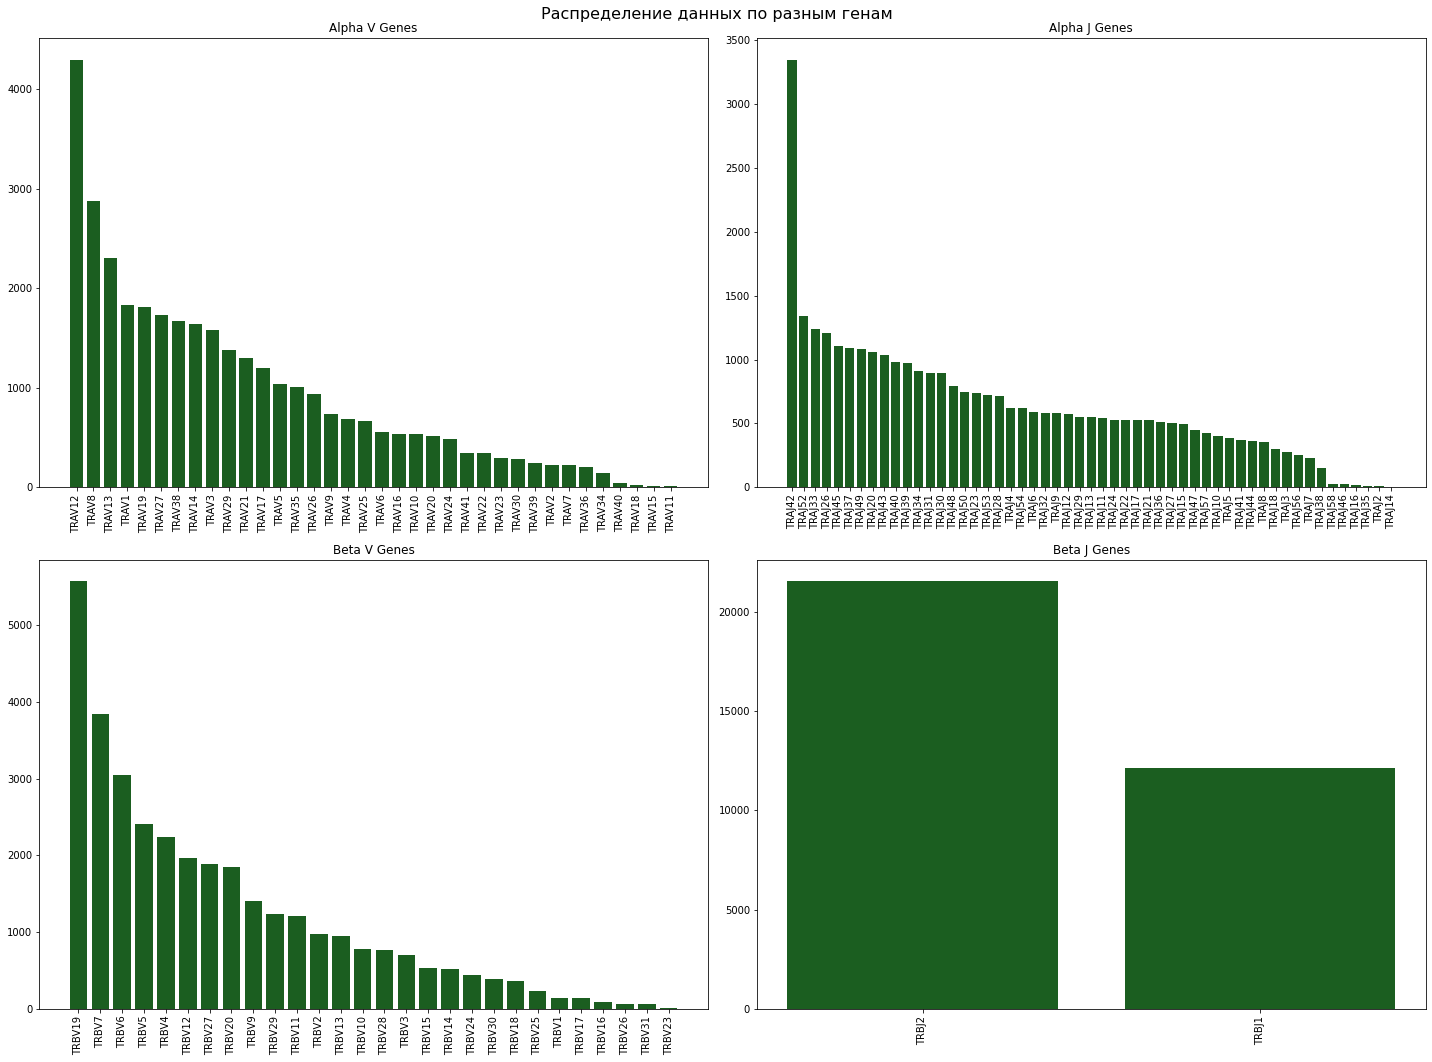

In [72]:
names = {'a_v': 'Alpha V Genes', 'a_j': 'Alpha J Genes', 'b_v': 'Beta V Genes', 'b_j': 'Beta J Genes'}

v_c = {}
for i in ['a_v', 'a_j', 'b_v', 'b_j']:
    try:
        v_c[i] = alpha_data[i].value_counts()
    except:
        v_c[i] = beta_data[i].value_counts()


fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

i = 1

plt.suptitle("Распределение данных по разным генам", fontsize=16)

for k, v in v_c.items():
    plt.subplot(2, 2, i)
    plt.bar(v.index, v.values, color='#1b5e20')
    plt.title(names[k])
    plt. xticks(rotation=90)
    i+=1

plt.tight_layout()
plt.savefig('/home/akabalina/nlp_tcr_predictor/diploma/imgs/non_resampled_gene_distrib.png')
plt.show()

In [73]:
from sklearn.utils import resample


def balance_majority(genes: pd.DataFrame, colu, min_count=20, max_count=1500):
    counts = genes[colu].value_counts()
    counts = counts.drop(counts[min_count>counts].index)
    resampled = pd.DataFrame()
    maj_clss = (counts[counts>max_count]).index
    left_genes = pd.DataFrame()
    mean_clss = counts[(counts<max_count) & (min_count<counts)].index#[i for i in genes[colu] if i not in min_classes]
    for cl in mean_clss:
        #print(cl)
        left_genes = pd.concat([left_genes, genes[genes[colu]==cl]])
    for maj_cl in maj_clss:        
        resampled = pd.concat([resampled, resample(genes[genes[colu] == maj_cl], replace=False, n_samples=max_count, random_state=42)])
    return pd.concat([left_genes, resampled])

In [74]:
b_resampled = balance_majority(beta_data, 'b_j', max_count=12500)
b_resampled = balance_majority(b_resampled, 'b_v', max_count=2500)

a_resampled = balance_majority(alpha_data, 'a_j', max_count=1000)
a_resampled = balance_majority(a_resampled, 'a_v', max_count=1500)


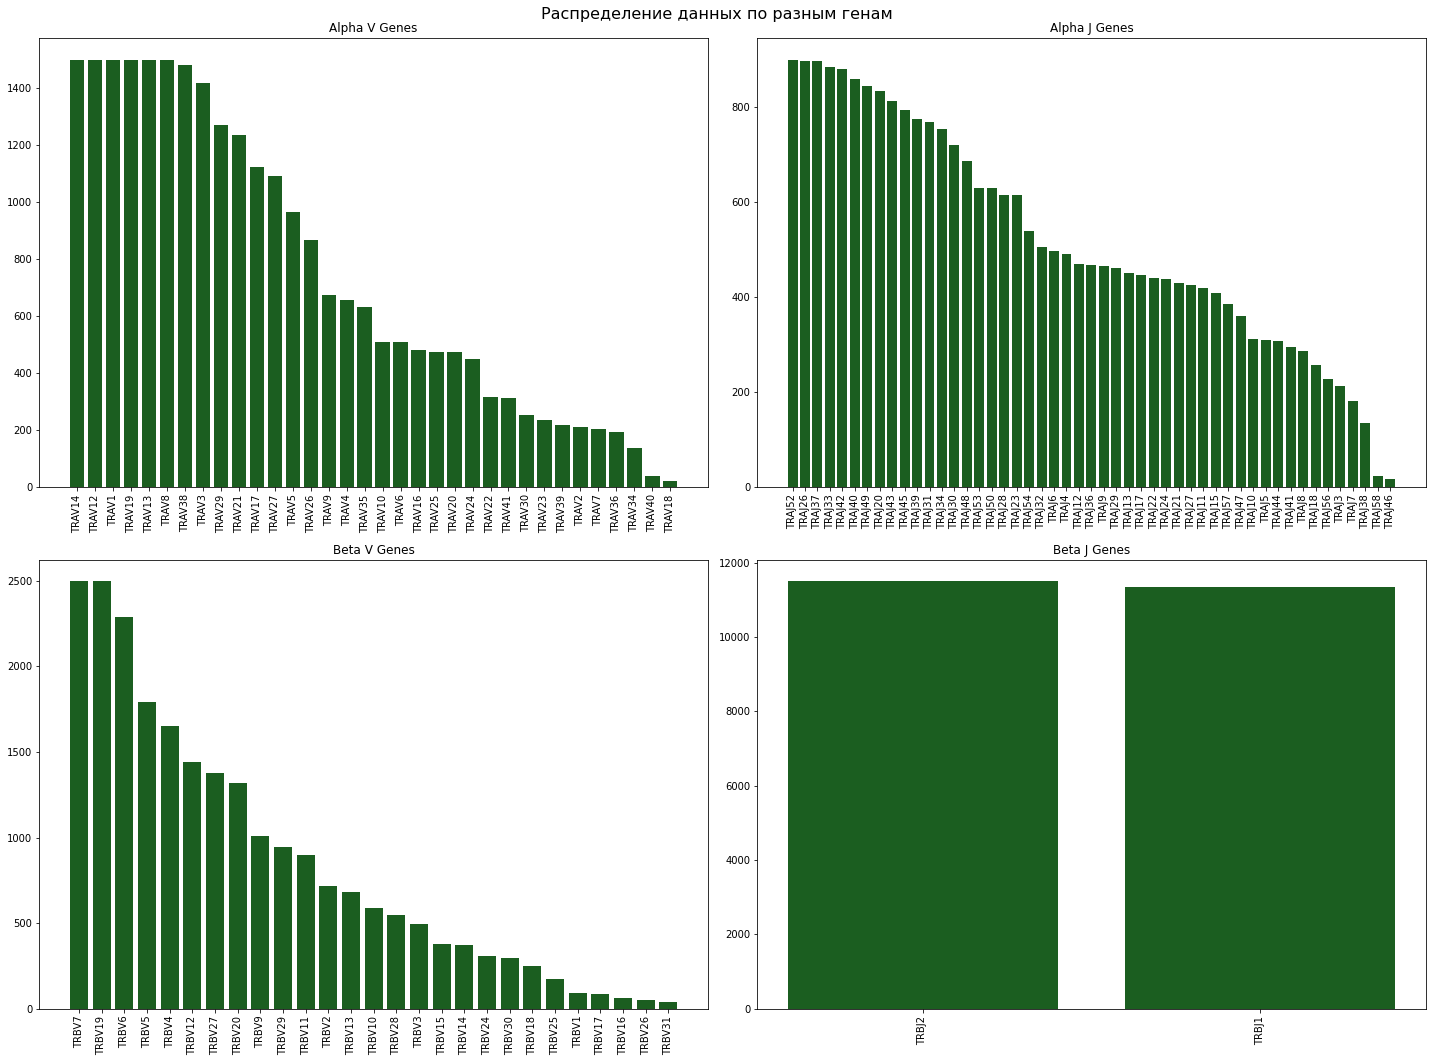

In [75]:
v_c = {}
for i in ['a_v', 'a_j', 'b_v', 'b_j']:
    try:
        v_c[i] = a_resampled[i].value_counts()
    except:
        v_c[i] = b_resampled[i].value_counts()


fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

i = 1

plt.suptitle("Распределение данных по разным генам", fontsize=16)

for k, v in v_c.items():
    plt.subplot(2, 2, i)
    plt.bar(v.index, v.values, color='#1b5e20')
    plt.title(names[k])
    plt. xticks(rotation=90)
    i+=1

plt.tight_layout()
# plt.savefig('/home/akabalina/nlp_tcr_predictor/diploma/imgs/non_resampled_gene_distrib.png')
plt.show()

In [76]:
extra_seqs_a = pd.read_csv('ex_seqs_a.tsv', sep='\t', header=None, names=['a_cdr3aa', 'a_v', 'a_j'])
extra_seqs_b = pd.read_csv('ex_seqs_b.tsv', sep='\t', header=None, names=['b_cdr3aa', 'b_v', 'b_j'])

extra_seqs_a['a_v'] = extra_seqs_a['a_v'].apply(process_types_light)
extra_seqs_b['b_v'] = extra_seqs_b['b_v'].apply(process_types_light)

extra_seqs_a['a_j'] = extra_seqs_a['a_j'].apply(process_types_light)
extra_seqs_b['b_j'] = extra_seqs_b['b_j'].apply(process_types_light)

extra_seqs_a

,a_cdr3aa,a_v,a_j
0,CAVEPMEYGNKLVF,TRAV36,TRAJ47
1,CALSEARKAAGNKLTF,TRAV19,TRAJ17
2,CAGSMNQGGKLIF,TRAV27,TRAJ23
3,CAMREGGDSGAGSYQLTF,TRAV14,TRAJ28
4,CALSETNRDNYGQNFVF,TRAV19,TRAJ26
...,...,...,...
99995,CASSMNRDDKIIF,TRAV29,TRAJ30
99996,CAGQSNFGNEKLTF,TRAV35,TRAJ48
99997,CAARFTNAGKSTF,TRAV23,TRAJ27
99998,CAASIGVGYGGSQGNLIF,TRAV13,TRAJ42


In [77]:
def select_seqs(df, gene_counts, chain='a'):
    result_dfs = []
    
    for gene, count in gene_counts.items():
        count = int(count)
        # Определяем, к какой колонке относится ген (V или J)
        if chain == 'a':
            col = 'a_v' if gene.startswith('TRAV') else 'a_j'  
        else:
            col = 'b_v' if gene.startswith('TRBV') else 'b_j'  
            
        # Выбираем строки с этим геном
        gene_df = df[df[col] == gene]
        
        # Если запрашиваем больше чем есть - берем все что есть
        n_samples = min(count, len(gene_df))
        
        # Случайно выбираем нужное количество
        if n_samples > 0:
            selected = gene_df.sample(n=n_samples, replace=False)
            result_dfs.append(selected)
    
    # Объединяем все выбранные последовательности и удаляем дубликаты
    if result_dfs:
        result_df = pd.concat(result_dfs).drop_duplicates()
        return result_df
    else:
        return pd.DataFrame(columns=df.columns)  # возвращаем пустой датафрейм с теми же колонками

In [78]:
gene_counts_av = round((1500 - v_c['a_v'])*0.5)
gene_counts_av = {k:int(v) for k, v in zip(gene_counts_av.index, gene_counts_av.values) if v>10 and v<800}
gene_counts_aj = round((1000 - v_c['a_j'])*0.5)
gene_counts_aj = {k:int(v) for k, v in zip(gene_counts_aj.index, gene_counts_aj.values)if v<450}

gene_counts_bv = round((2500 - v_c['b_v'])*0.3)
gene_counts_b = {k:int(v) for k, v in zip(gene_counts_bv.index, gene_counts_bv.values)}

In [79]:
# gene_counts_a = {k:int(v) for k, v in zip(gene_counts_aj.index, gene_counts_aj.values)}.update({k:int(v) for k, v in zip(gene_counts_av.index, gene_counts_av.values)})

In [80]:
gene_counts_a = {**gene_counts_av, **gene_counts_aj}
# gene_counts_a

In [81]:
selected_sex_ex_a = select_seqs(extra_seqs_a, gene_counts_a)

In [87]:
gene_counts_a

{'TRAV3': 40,
 'TRAV29': 114,
 'TRAV21': 132,
 'TRAV17': 189,
 'TRAV27': 204,
 'TRAV5': 267,
 'TRAV26': 316,
 'TRAV9': 412,
 'TRAV4': 422,
 'TRAV35': 434,
 'TRAV10': 494,
 'TRAV6': 496,
 'TRAV16': 510,
 'TRAV25': 514,
 'TRAV20': 514,
 'TRAV24': 524,
 'TRAV22': 591,
 'TRAV41': 594,
 'TRAV30': 624,
 'TRAV23': 632,
 'TRAV39': 640,
 'TRAV2': 644,
 'TRAV7': 648,
 'TRAV36': 653,
 'TRAV34': 682,
 'TRAV40': 730,
 'TRAV18': 740,
 'TRAJ52': 50,
 'TRAJ26': 51,
 'TRAJ37': 52,
 'TRAJ33': 58,
 'TRAJ42': 60,
 'TRAJ40': 70,
 'TRAJ49': 78,
 'TRAJ20': 84,
 'TRAJ43': 94,
 'TRAJ45': 103,
 'TRAJ39': 113,
 'TRAJ31': 116,
 'TRAJ34': 124,
 'TRAJ30': 140,
 'TRAJ48': 156,
 'TRAJ53': 186,
 'TRAJ50': 186,
 'TRAJ28': 192,
 'TRAJ23': 192,
 'TRAJ54': 230,
 'TRAJ32': 247,
 'TRAJ6': 251,
 'TRAJ4': 254,
 'TRAJ12': 265,
 'TRAJ36': 266,
 'TRAJ9': 268,
 'TRAJ29': 270,
 'TRAJ13': 275,
 'TRAJ17': 277,
 'TRAJ22': 280,
 'TRAJ24': 280,
 'TRAJ21': 285,
 'TRAJ27': 288,
 'TRAJ11': 290,
 'TRAJ15': 296,
 'TRAJ57': 308,
 'TRAJ47': 3

In [82]:
selected_sex_ex_b = select_seqs(extra_seqs_b, gene_counts_b, chain='b')

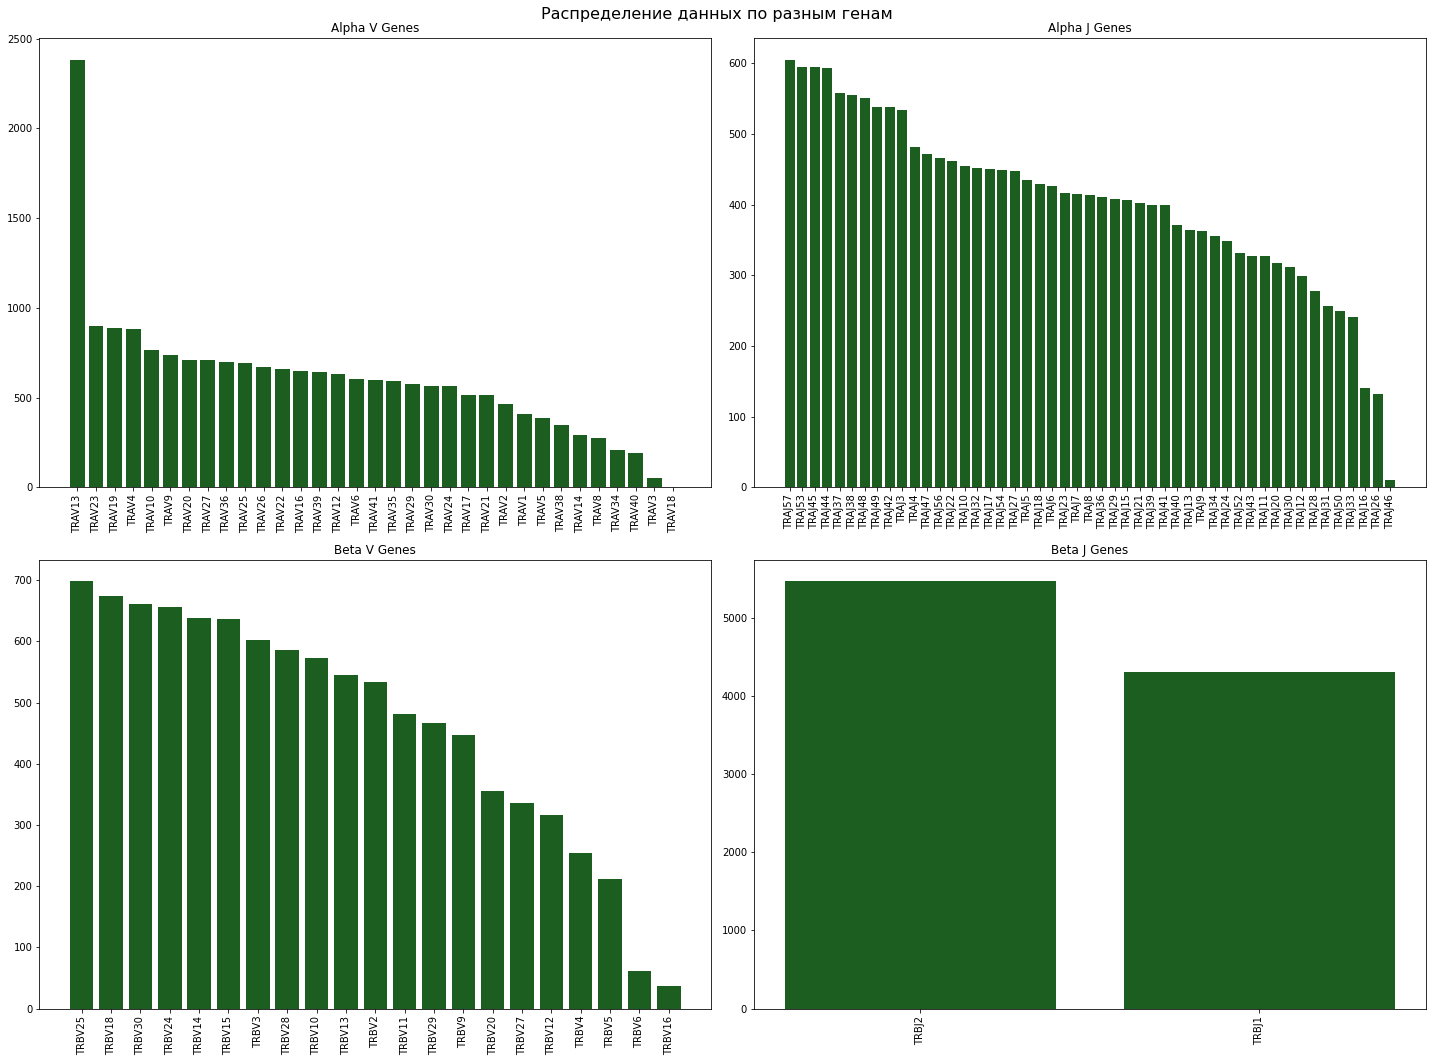

In [83]:
v_c_ = {}
for i in ['a_v', 'a_j', 'b_v', 'b_j']:
    try:
        v_c_[i] = selected_sex_ex_a[i].value_counts()
    except:
        v_c_[i] = selected_sex_ex_b[i].value_counts()


fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

i = 1

plt.suptitle("Распределение данных по разным генам", fontsize=16)

for k, v in v_c_.items():
    plt.subplot(2, 2, i)
    plt.bar(v.index, v.values, color='#1b5e20')
    plt.title(names[k])
    plt. xticks(rotation=90)
    i+=1

plt.tight_layout()
# plt.savefig('/home/akabalina/nlp_tcr_predictor/diploma/imgs/non_resampled_gene_distrib.png')
plt.show()

In [116]:
a_balanced = pd.concat([a_resampled, selected_sex_ex_a], axis=0)
b_balanced = pd.concat([b_resampled, selected_sex_ex_b], axis=0)

In [117]:
b_balanced = balance_majority(b_balanced, 'b_v', max_count=2000)

a_balanced = balance_majority(a_balanced, 'a_j', max_count=1000)
a_balanced = balance_majority(a_balanced, 'a_v', max_count=1500)


In [118]:
av_minor = v_c['a_v'][v_c['a_v']<200].index
aj_minor = v_c['a_j'][v_c['a_j']<200].index

bv_minor = v_c['b_v'][v_c['b_v']<150].index
a_balanced = a_balanced[~a_balanced.a_v.isin(av_minor)]
a_balanced = a_balanced[~a_balanced.a_j.isin(aj_minor)]

b_balanced = b_balanced[~b_balanced.b_v.isin(bv_minor)]

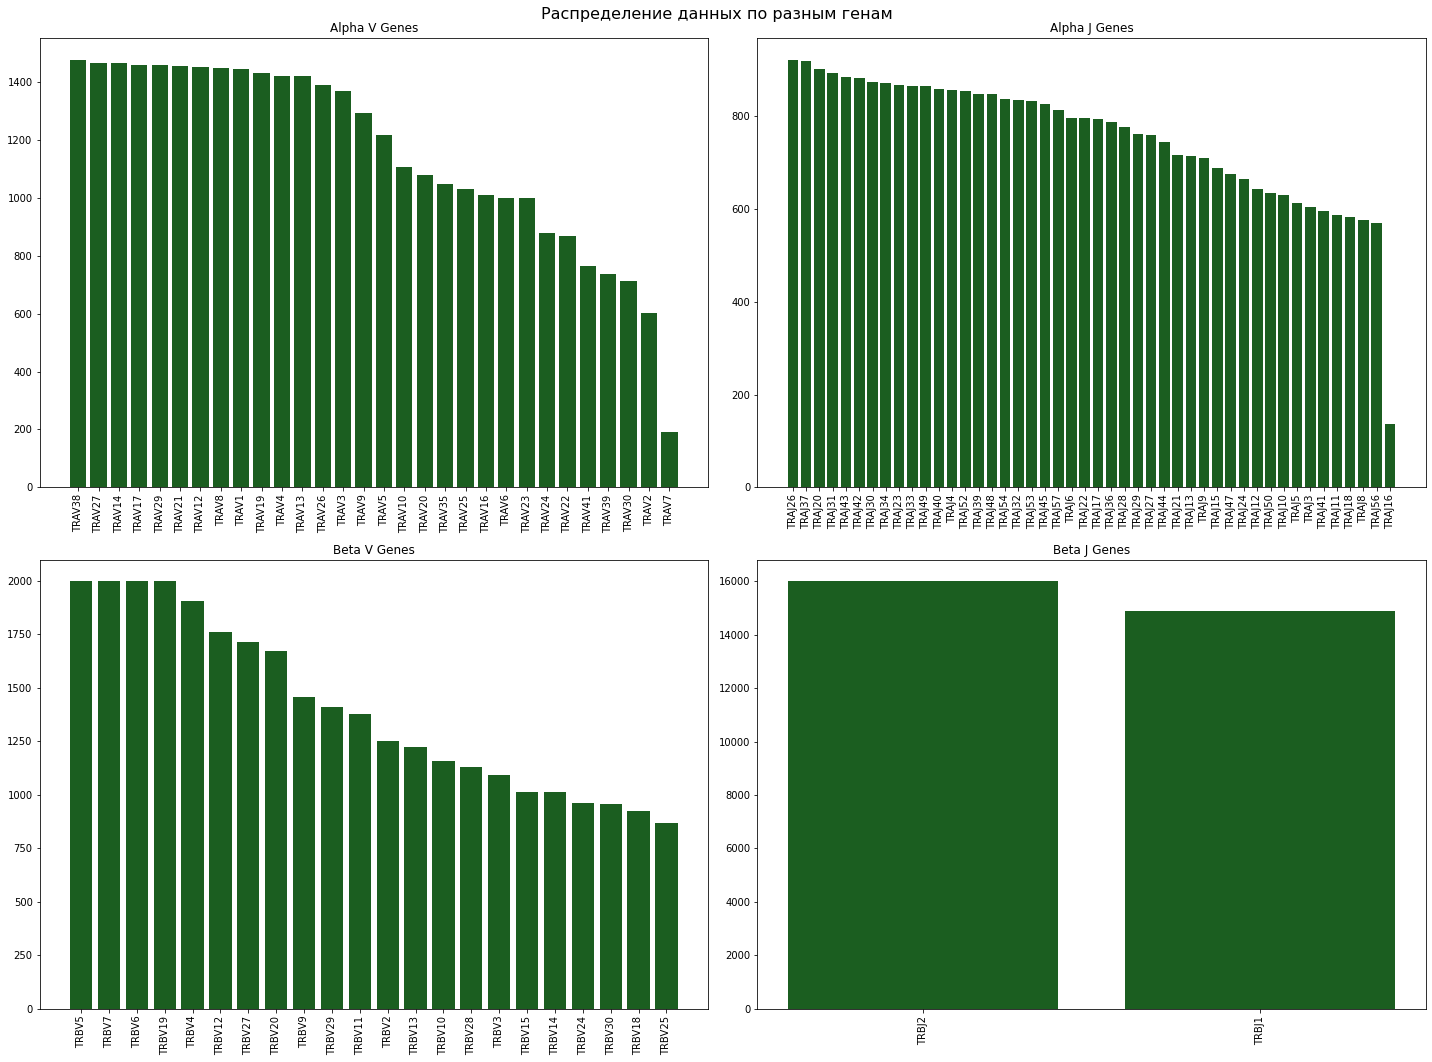

In [120]:
v_c_balanced = {}
for i in ['a_v', 'a_j', 'b_v', 'b_j']:
    try:
        v_c_balanced[i] = a_balanced[i].value_counts()
    except:
        v_c_balanced[i] = b_balanced[i].value_counts()


fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

i = 1

plt.suptitle("Распределение данных по разным генам", fontsize=16)

for k, v in v_c_balanced.items():
    plt.subplot(2, 2, i)
    plt.bar(v.index, v.values, color='#1b5e20')
    plt.title(names[k])
    plt. xticks(rotation=90)
    i+=1

plt.tight_layout()
plt.savefig('/home/akabalina/nlp_tcr_predictor/diploma/imgs/resampled_gene_distrib.png')
plt.show()

In [111]:
a_balanced = a_balanced.rename(columns = {'a_cdr3aa': 'cdr3aa', 'a_v': 'v', 'a_j': 'j'}).reset_index(drop=True)
b_balanced = b_balanced.rename(columns = {'b_cdr3aa': 'cdr3aa', 'b_v': 'v', 'b_j': 'j'}).reset_index(drop=True)

In [112]:
from sklearn.model_selection import train_test_split

train_a, test_a = train_test_split(a_balanced, test_size=0.25, random_state=42)
train_b, test_b = train_test_split(b_balanced, test_size=0.25, random_state=42)


In [114]:
train_a.to_csv('balanced data for clf/train_alpha.csv', index=False)
train_b.to_csv('balanced data for clf/train_beta.csv', index=False)

test_a.to_csv('balanced data for clf/test_alpha.csv', index=False)
test_b.to_csv('balanced data for clf/test_beta.csv', index=False)